In [2]:
from anndata import read_h5ad
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from embed import read_tcga
import os

# setup output directory
if not os.path.exists("figures"):
	os.mkdir("figures")

/raidixshare_log-g/mcuoco/projects/ece204_project1/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# read in the data
adata = read_tcga()
adata.obs.columns

Reading data/TCGA.HNSC.expression.txt...
Reading data/TCGA.HNSC.metadata.txt...
Cleaning metadata...
Creating AnnData object...


Index(['type', 'age_at_initial_pathologic_diagnosis', 'gender', 'race',
       'ajcc_pathologic_tumor_stage', 'histological_type',
       'histological_grade', 'tumor_status', 'vital_status', 'OS', 'OS.time',
       'DSS', 'DSS.time', 'DFI', 'DFI.time', 'PFI', 'PFI.time', 'Redaction',
       'tissue_source_site', 'sample_type', 'histological_grade_num'],
      dtype='object')

/raidixshare_log-g/mcuoco/projects/ece204_project1/.venv/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 10.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


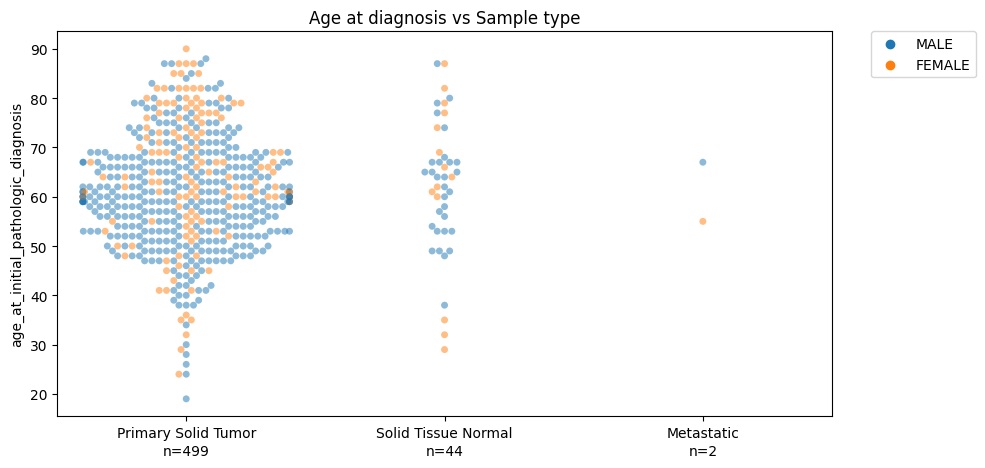

In [19]:
sns.swarmplot(adata.obs, y="age_at_initial_pathologic_diagnosis", hue="gender", x="sample_type", alpha=0.5)
# add number of points for each sample type
for i, s in enumerate(adata.obs["sample_type"].unique()):
	n = adata.obs["sample_type"].value_counts()[s]
	n = f"n={n}"
	plt.text(i, 7, n, ha='center', va='bottom', size=10)

# move legend outside of plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# hide axis labels
plt.xlabel("")

# make wider
plt.gcf().set_size_inches(10, 5)

# save
plt.title("Age at diagnosis vs Sample type")
plt.savefig("figures/age_vs_sampletype.png", dpi=300, bbox_inches="tight")

/tmp/ipykernel_57077/167324946.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["histological_type"] = df["histological_type"].apply(lambda x: x.replace("Head & Neck Squamous Cell Carcinoma","HNSCC"))


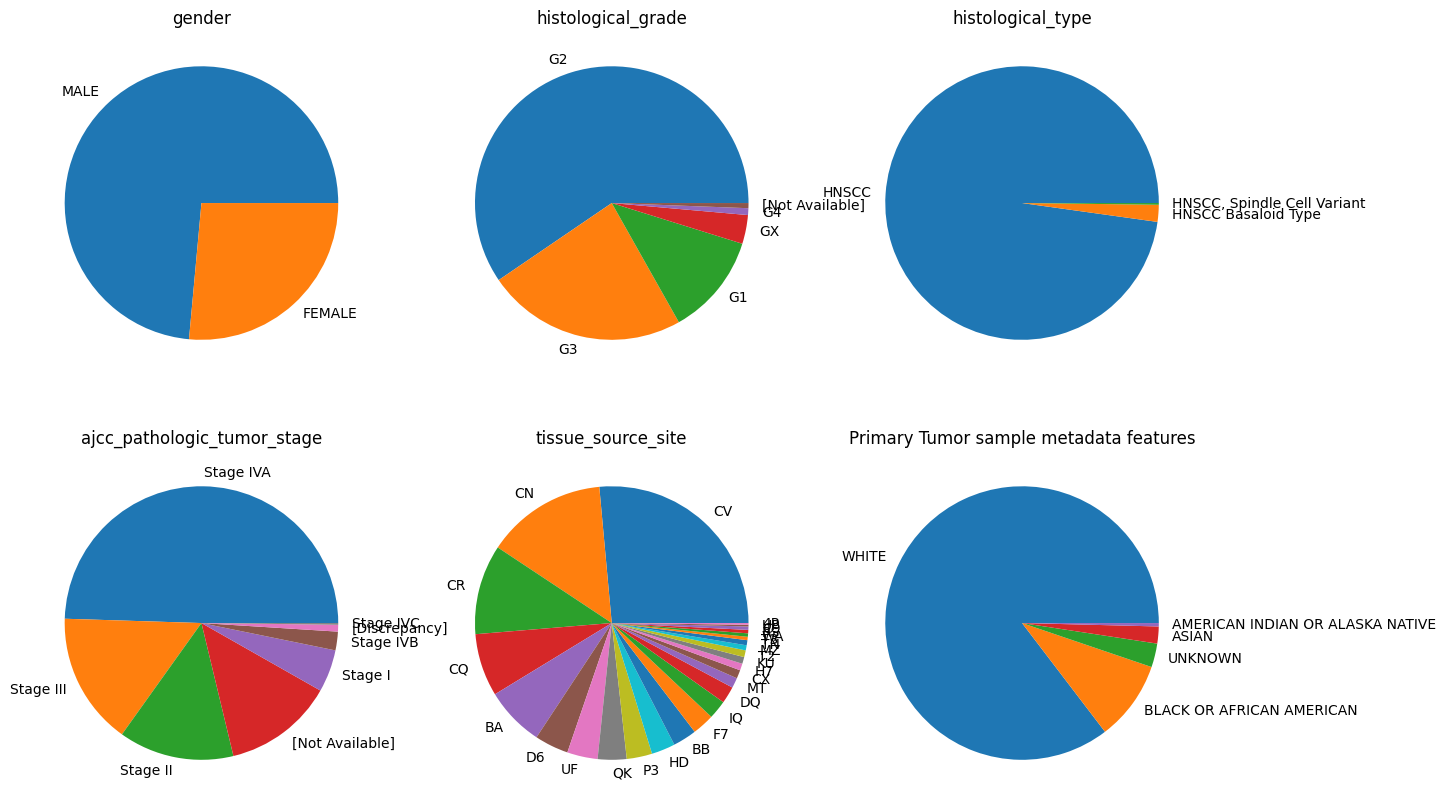

In [20]:
# view patient features
df = adata.obs[adata.obs["sample_type"] == "Primary Solid Tumor"]
df["histological_type"] = df["histological_type"].apply(lambda x: x.replace("Head & Neck Squamous Cell Carcinoma","HNSCC"))

# setup subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# add space between plots
fig.subplots_adjust(hspace=0.2, wspace=0.2)

var = ["gender", "histological_grade", "histological_type", "ajcc_pathologic_tumor_stage", "tissue_source_site", "race"]
for i, v in enumerate(var):
	axes[i//3, i%3].set_title(v)
	df[v].value_counts().plot.pie(ax=axes[i//3, i%3], ylabel='')

plt.title("Primary Tumor sample metadata features")
plt.savefig("figures/primary_tumor_summary.png", dpi=300)